<a href="https://colab.research.google.com/github/GuiiFg/AnaliseeProcessamentodeImagens/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iniciando o tratamento de imagens para geração da base para treinamento da IA

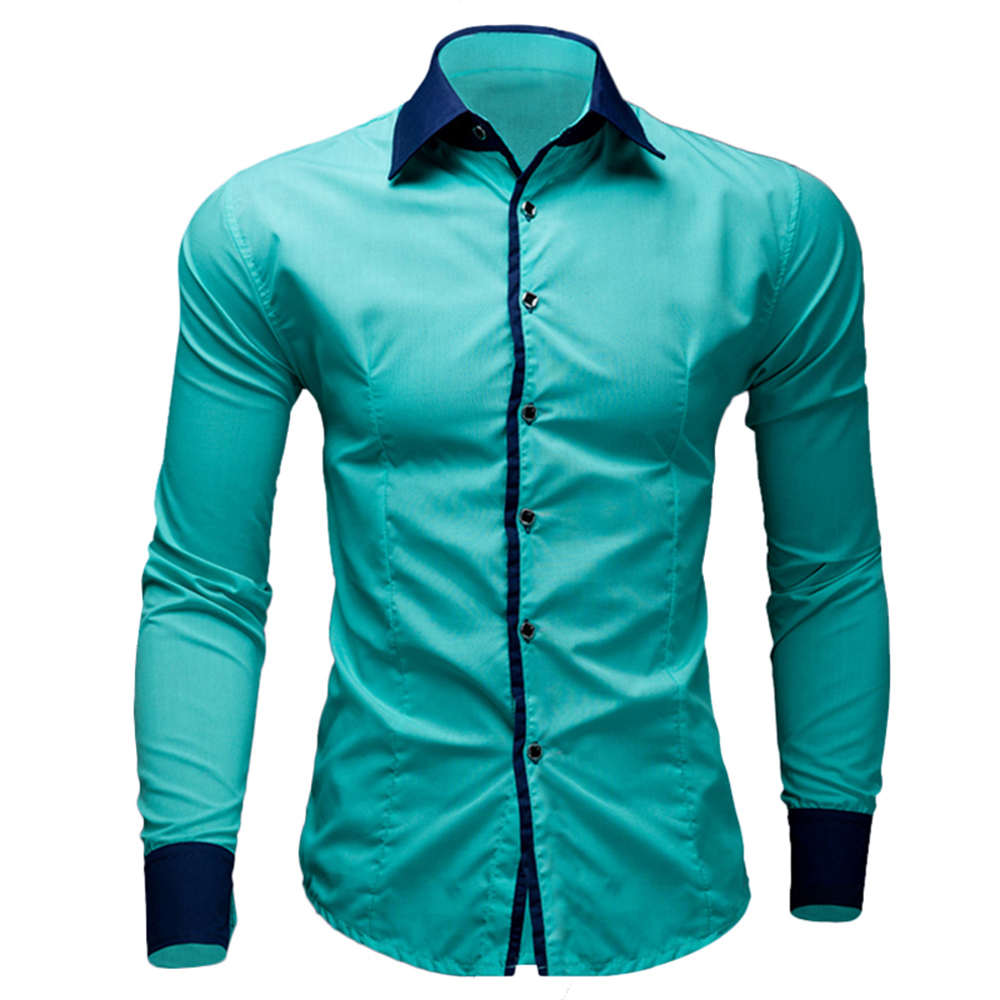

Original Dimensions :  (1000, 1000)
Resized Dimensions :  (28, 28)


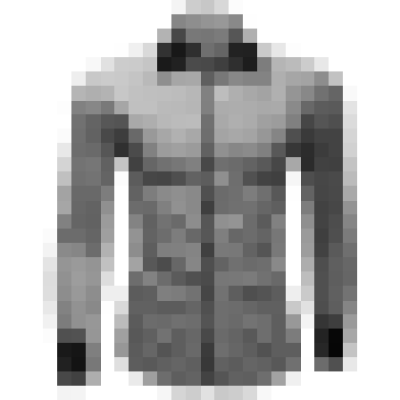

In [136]:
import cv2
from google.colab.patches import cv2_imshow
 
img = cv2.imread('/content/images/camisa.png', cv2.IMREAD_UNCHANGED)

cv2_imshow(img)

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 
print('Original Dimensions : ',img.shape)

dim = (28, 28)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
 
cv2_imshow(resized)

resizedPrint = cv2.resize(resized, (400,400), interpolation = cv2.INTER_AREA)

cv2_imshow(resizedPrint)

laplacian = cv2.Laplacian(resized,cv2.CV_64F)

cv2_imshow(laplacian)

In [114]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


In [115]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [116]:
class_names = ['Camisa', 'Calca', 'Pullover', 'Vestido', 'Casato',
               'Sandalha', 'Camisa2', 'Tenis', 'Bolsa', 'Bota']

In [117]:
train_images.shape

(60000, 28, 28)

In [118]:
len(train_labels)

60000

In [119]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [120]:
test_images.shape

(10000, 28, 28)

In [121]:
len(test_labels)

10000

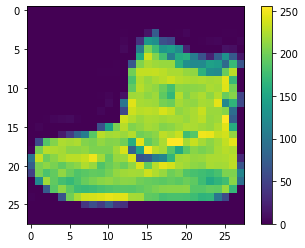

In [122]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [123]:
train_images = train_images / 255.0

test_images = test_images / 255.0

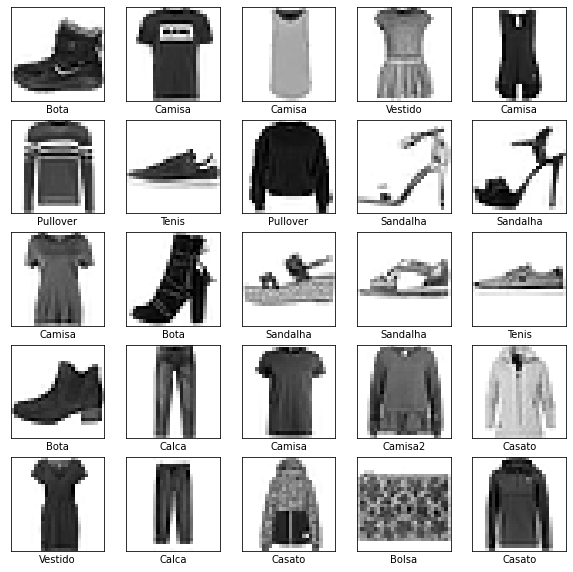

In [124]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [125]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [126]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
model.fit(train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4989 - accuracy: 0.8242
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3746 - accuracy: 0.8655
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3363 - accuracy: 0.8783
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3126 - accuracy: 0.8857
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.8918
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.8967
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2725 - accuracy: 0.8988
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2585 - accuracy: 0.9040
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2485 - accuracy: 0.9074
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

In [76]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4013 - accuracy: 0.8892 - 623ms/epoch - 2ms/step

Test accuracy: 0.88919997215271


In [79]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [83]:
predictions[0]

array([4.9283727e-18, 5.8764067e-20, 4.5154194e-21, 3.4138776e-24,
       3.1890045e-20, 5.3811402e-07, 1.6363659e-17, 5.5338487e-06,
       1.3013094e-17, 9.9999386e-01], dtype=float32)

In [81]:
np.argmax(predictions[0])

9

In [82]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

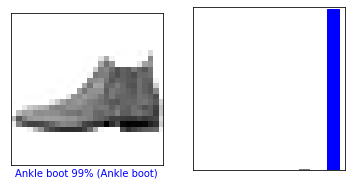

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

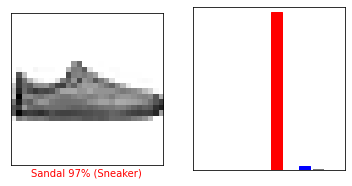

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

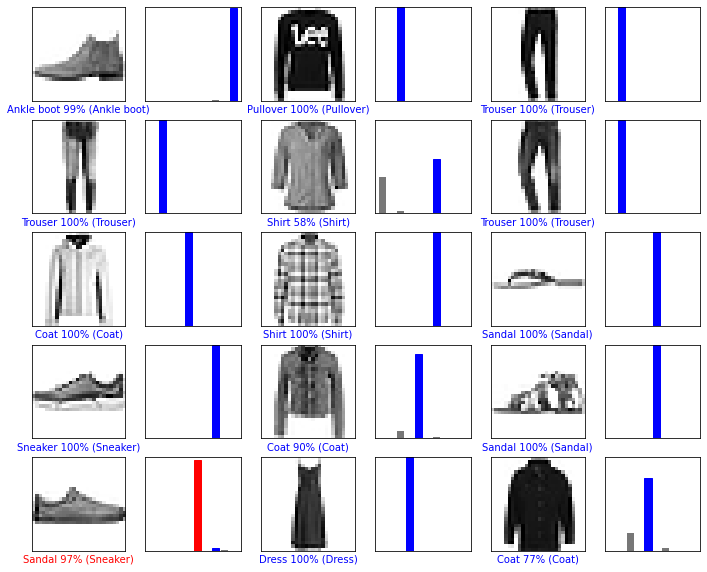

In [ ]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# Grab an image from the test dataset.
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.5646282e-08 3.9490688e-11 8.8852863e-11 1.3396104e-12 4.8850529e-10
  4.5518449e-04 1.7914500e-10 8.5904505e-03 6.4038153e-10 9.9095434e-01]]


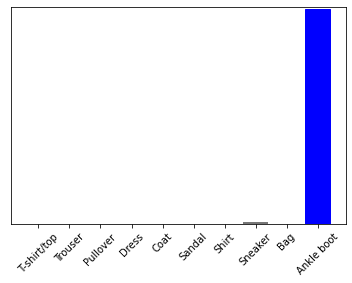

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9